# K-means clustering

Is unsupervised clustering algorithm where you know how many clusters are appropriate

Use cases:

- Market price and cost modeling
- Hedge fund classification
- Insurance claim fraud detection
- Customer segmentation

The K-means clustering algorithm is a simple unsupervised algoritm that is used for quickly predicting groupings from within an unlabeled dataset

Predictions are made based on centroids present (K) and nearest mean values, given an Euclidean distance measurment between observations

When using K-means:

- Scale your variables
- Look at scatterplot or the data table to estimate the appropriate number of centroids to use for the K parameter value 

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as sm 
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import axis3d
from sklearn import datasets

In [6]:
%matplotlib inline
plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

### Load data

In [8]:
iris = datasets.load_iris()

x = scale(iris.data)
y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
x[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

### Building and running your model

In [10]:
clustering = KMeans(n_clusters=3, random_state=5)

clustering.fit(x)

KMeans(n_clusters=3, random_state=5)

### Plotting your model outputs

In [14]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

Text(0.5, 1.0, 'K-means Classification')

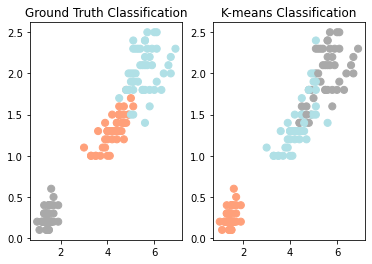

In [15]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title('K-means Classification')

Text(0.5, 1.0, 'K-means Classification')

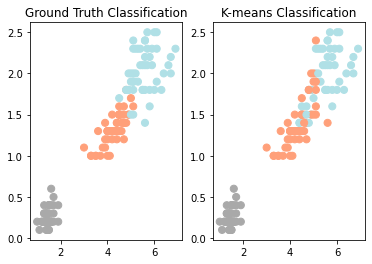

In [16]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)

color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[relabel], s=50)
plt.title('K-means Classification')


### Evaluate your clustering results

In [18]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



**Precision** is a measure of the model's relevancy  
**Recall** is a measure of model's completeness  

High *precision* + High *recall* = Highly accurate model results

In our case for precision:

0: For all the points predicted to have 0 label, 100% of the retrieved instances were relevant  
1: For all the points predicted to have 1 label, 74% of the retrieved instances were relevant

For recall:

2: For all your points that were labeled 2, 72% of the results that were returned were trully relevant
